# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 7866.0 seconds with an integrated measurement of 0.065902847.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o
The flux:
 5.0000e-09 5.9658e-10 3.3105e-09 7.3413e-09 5.5448e-09 3.8396e-09 2.9108e-09 
 2.1463e-09 1.7558e-09 1.1270e-09 7.0451e-10 7.0414e-10 8.1038e-10 1.0522e-09 
 1.1427e-09 1.0875e-09 1.8313e-09 1.2878e-09 8.2658e-10 1.2799e-09 1.8487e-09 
 9.3718e-10 1.8186e-09 1.1280e-09 4.8416e-10 4.9511e-10 5.2916e-10 1.0874e-09 
 1.1649e-09 7.8652e-10 9.0167e-10 1.9005e-09 1.0445e-09 6.0306e-10 5.0935e-10 
 1.3961e-09 9.3846e-10 1.1765e-09 2.1001e-09 1.1833e-09 1.5757e-09 2.6332e-09 
 1.9251e-09 3.9669e-09 5.3677e-09 3.6788e-09 3.0058e-09 8.9772e-09 9.8661e-09 
 1.8694e-08 2.3001e-08 2.4866e-08 2.6623e-08 3.3887e-08 3.8048e-08 4.4267e-08 
 5.1840e-08 3.7116e-08 5.1845e-08 6.1626e-08 8.7745e-08 8.6490e-08 8.9304e-08 
 9.2638e-08 1.0444e-07 1.0667e-07 1.1373e-07 1.0654e-07 1.4164e-07 1.4561e-07 
 3.8050e-07 3.8831e-07 3.7847e-07 3.7171e-07 3.7737e-07 5.77

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,1.207200e+11,2.255600e+10,5.352,2.380598e+10,2.255600e+10,0.197,326240.000,0.56
2,1.000000e-09,6.729100e+08,2.691200e+08,2.500,3.142490e+07,6.978282e+07,0.180,326130.000,0.56
3,1.000000e-08,2.389200e+09,1.033900e+09,2.311,1.001075e+08,1.876528e+08,0.231,326120.000,0.56
4,2.300000e-08,2.140600e+09,1.103900e+09,1.939,7.342258e+07,1.206563e+08,0.314,326090.000,0.56
5,5.000000e-08,2.343400e+09,8.658400e+08,2.707,1.628663e+08,1.504830e+08,0.400,326030.000,0.56
6,7.600000e-08,9.118900e+08,3.997100e+08,2.281,5.225130e+07,4.728569e+07,0.484,325970.000,0.56
7,1.150000e-07,5.916400e+08,2.148700e+08,2.753,5.034856e+07,3.255280e+07,0.562,325940.000,0.56
8,1.700000e-07,5.192700e+08,1.025200e+08,5.065,1.110719e+08,3.470302e+07,0.632,325910.000,0.56
9,2.550000e-07,3.253400e+08,5.702800e+07,5.705,8.784180e+07,2.216108e+07,0.695,325860.000,0.56
10,3.800000e-07,1.138200e+08,2.691500e+07,4.229,2.324204e+07,7.318188e+06,0.751,325820.000,0.56


Convert to Histograms and plot the adjusted and unadjusted flux.

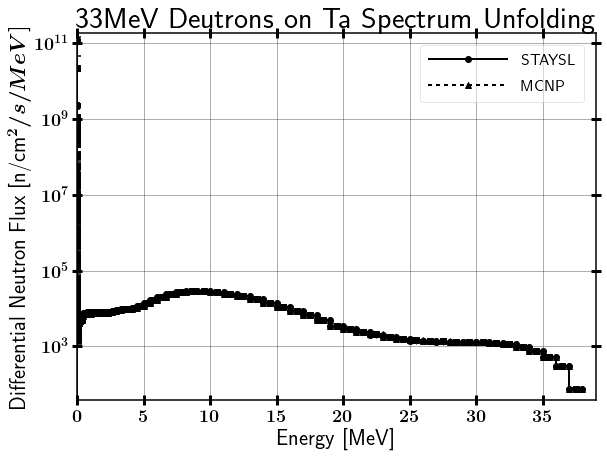

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

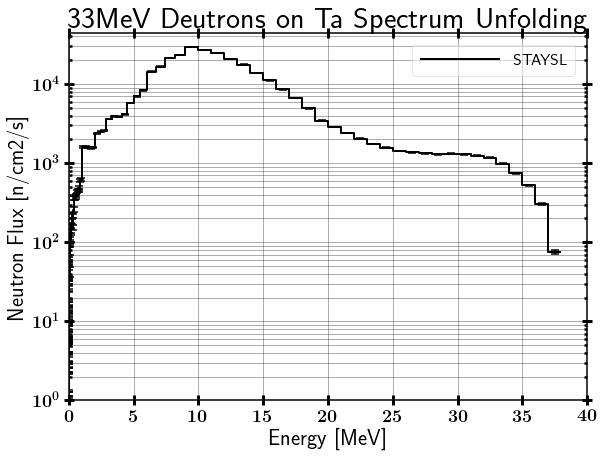

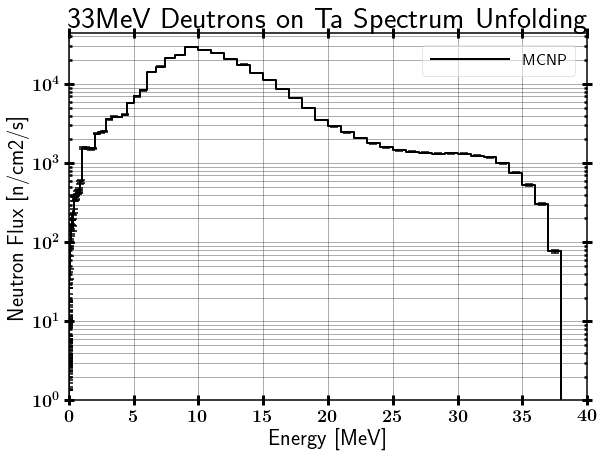

C:\Users\James\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


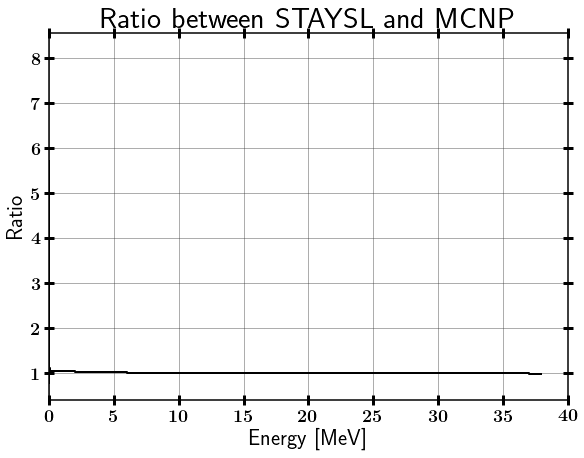

In [6]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 4.0600E+9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iterative Solution #1:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does not update the uncertainty until $\chi^2$ converged.

In [7]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 3.8486, Std Norm = 5.29863361821
Chi^2 = 3.83653
Chi^2 = 3.82505
Chi^2 = 3.81412
Chi^2 = 3.80363
Chi^2 = 3.79378
Std Norm = 5.2131235464, 5.29767501646


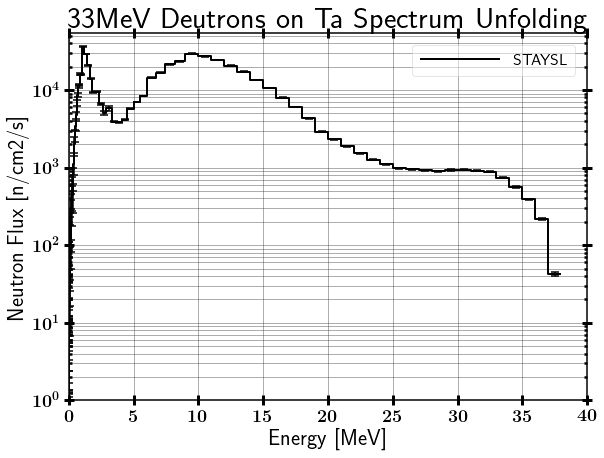

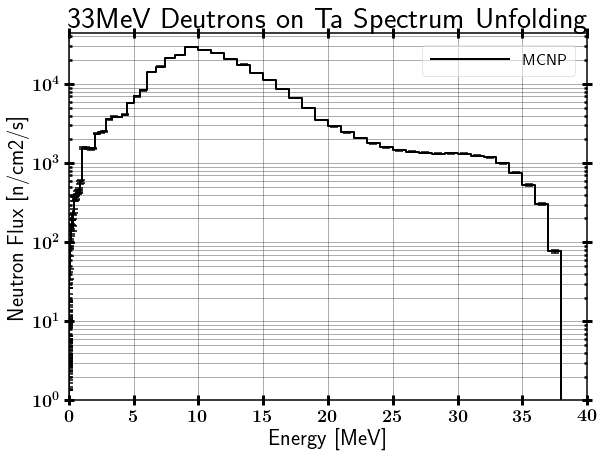

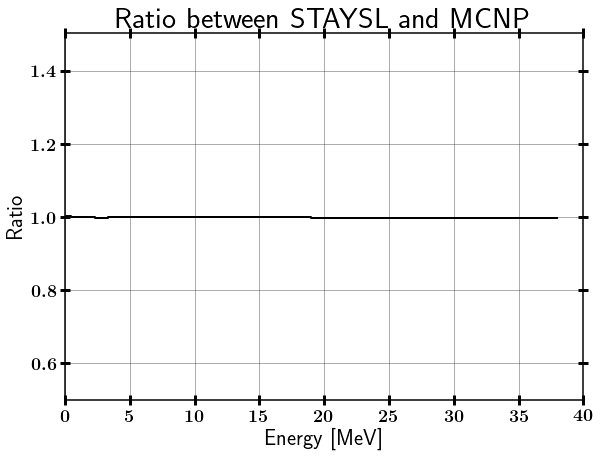

In [8]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does update the uncertainty throughout the convergence process.

In [9]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 3.89593, Std Norm = 3.89506014459
Chi^2 = 3.88666
Std Norm = 3.86969985787, 3.88223716174


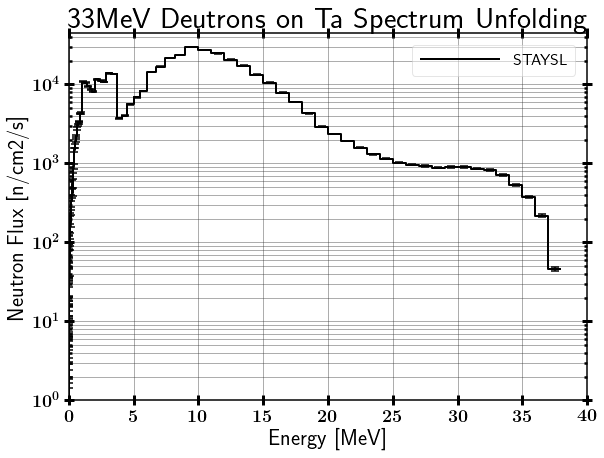

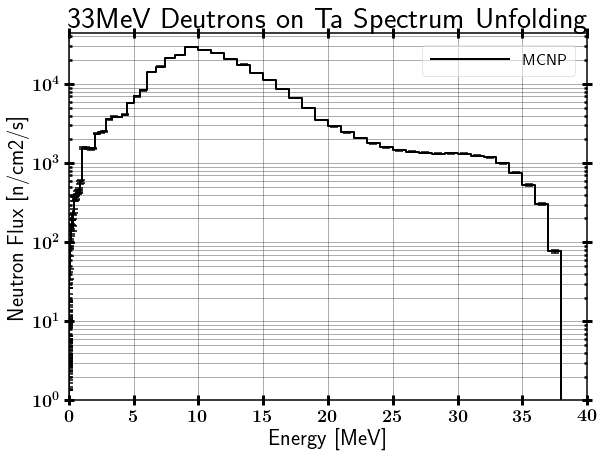

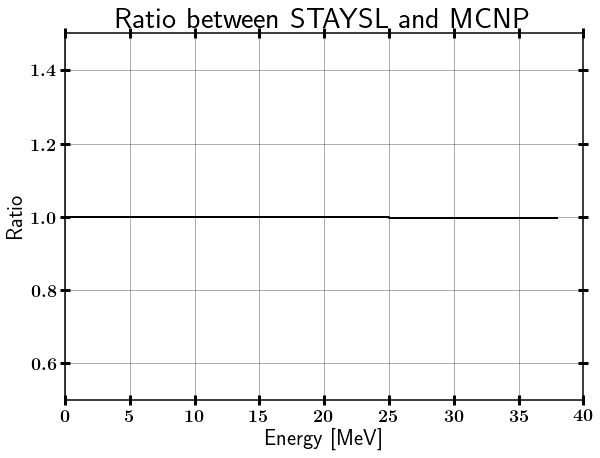

In [10]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #3:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [11]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.001))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/
$\chi^2$ Convergence: 0.001
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out
Chi^2 = 2.13854, Std Norm = 1.39848484082
Chi^2 = 2.13739
Chi^2 = 2.13622
Chi^2 = 2.13522
Std Norm = 1.39840720822, 1.39842863601


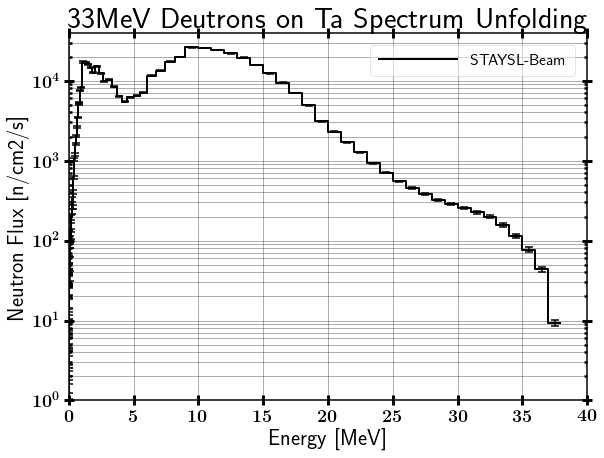

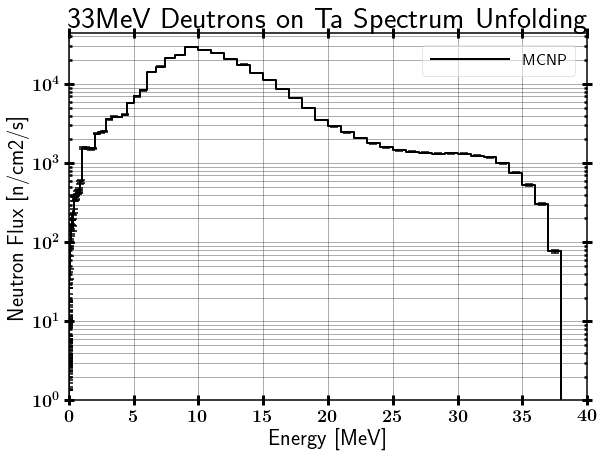

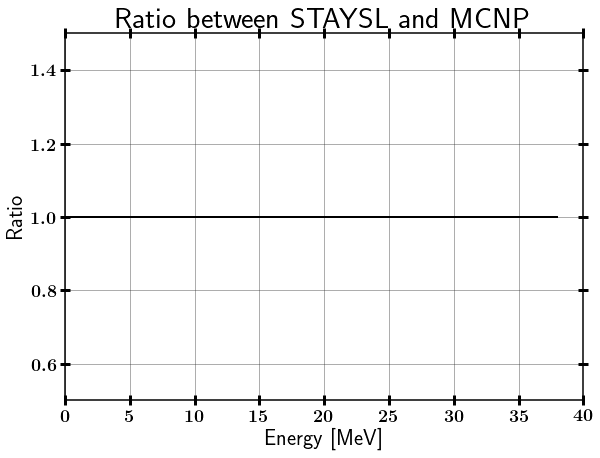

In [12]:
iter = 2

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL-Beam')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

#### Create MCNP Input Source

Using this unfold, create the MCNP input source spectrum.

In [13]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())
print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

### Iterative Solution #4:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [14]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/stayslin.out
Chi^2 = 1.91625, Std Norm = 5.21566760444
Chi^2 = 1.91214
Std Norm = 5.09611611426, 5.1493506979


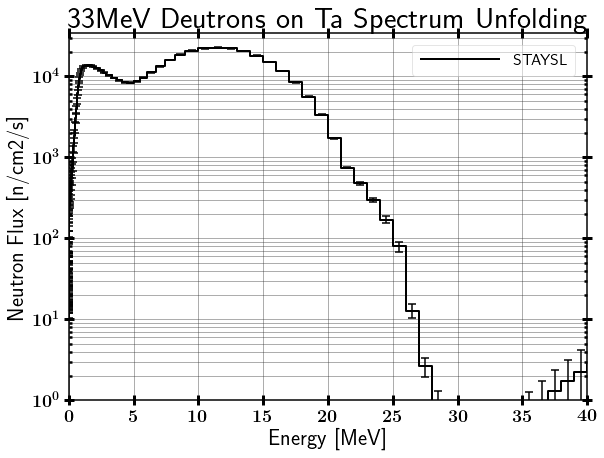

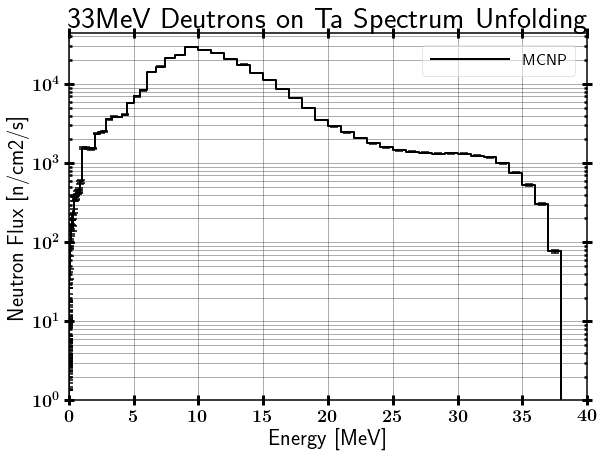

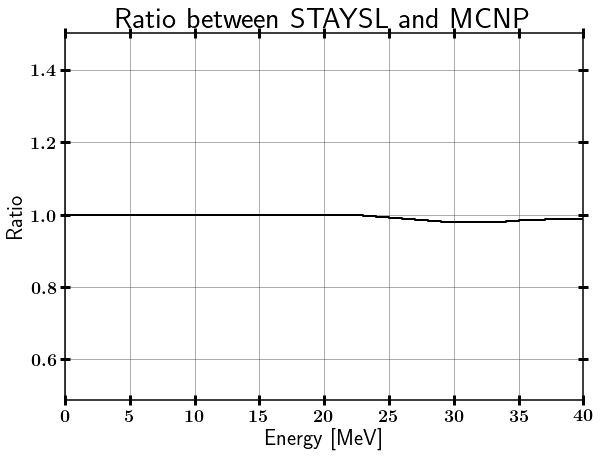

In [15]:
iter = 3

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #5:

  - This solution sets the uncertainty to 100 % for all bins. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [16]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/stayslin.out
Chi^2 = 16.52089, Std Norm = 9.50527885809
Chi^2 = 2.34574
Chi^2 = 1.74452
Chi^2 = 1.68706
Chi^2 = 1.6671
Chi^2 = 1.65561
Chi^2 = 1.6474
Std Norm = 7.48619946101, 7.61330775879
Std Norm = 7.37699350481, 7.48619946101
Std Norm = 7.28226730284, 7.37699350481


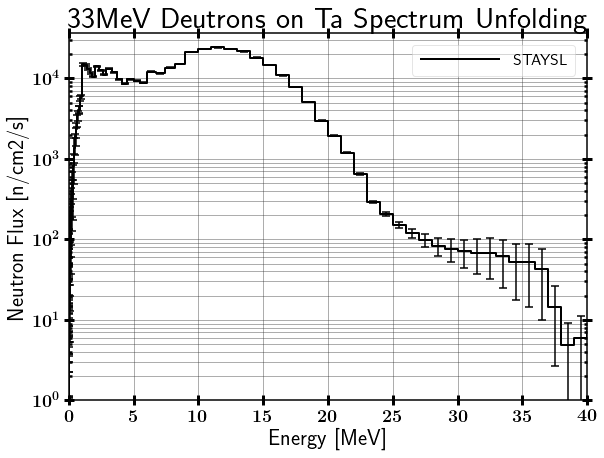

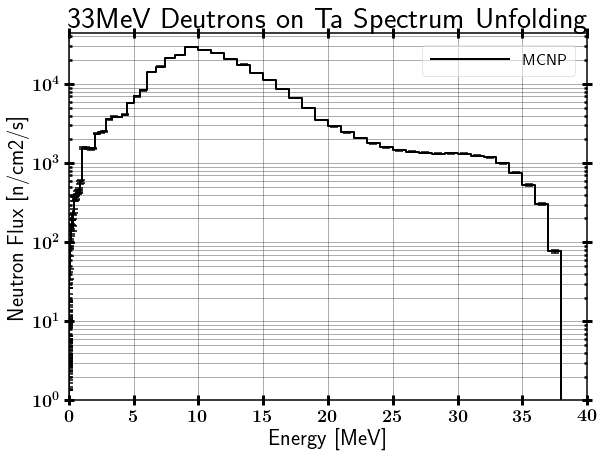

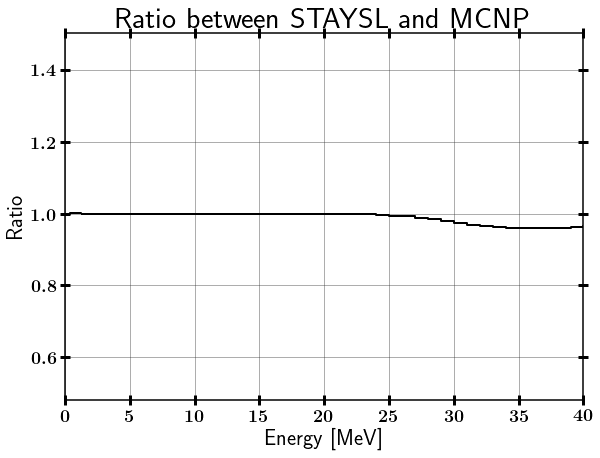

In [17]:
iter = 4

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #6:

  - This solution sets the uncertainty to 100 % for all bins up to 38 MeV. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [18]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/stayslin.out
Chi^2 = 16.5197, Std Norm = 8.27789477222
Chi^2 = 2.33924
Chi^2 = 1.73989
Chi^2 = 1.6828
Chi^2 = 1.6632
Chi^2 = 1.65194
Chi^2 = 1.64402
Std Norm = 5.94502805712, 6.09365046749
Std Norm = 5.81708604286, 5.94502805712
Std Norm = 5.70597082975, 5.81708604286
Std Norm = 5.60842125023, 5.70597082975


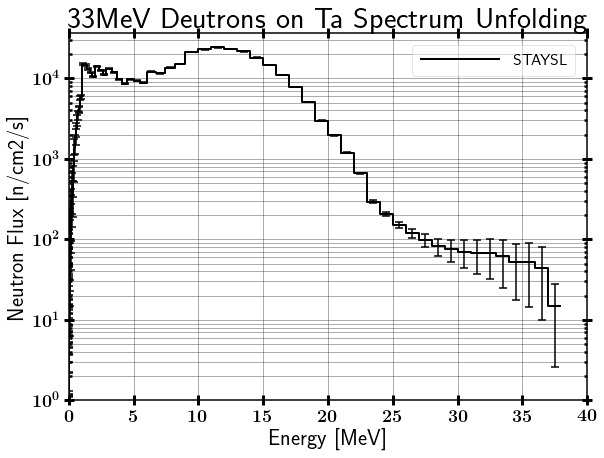

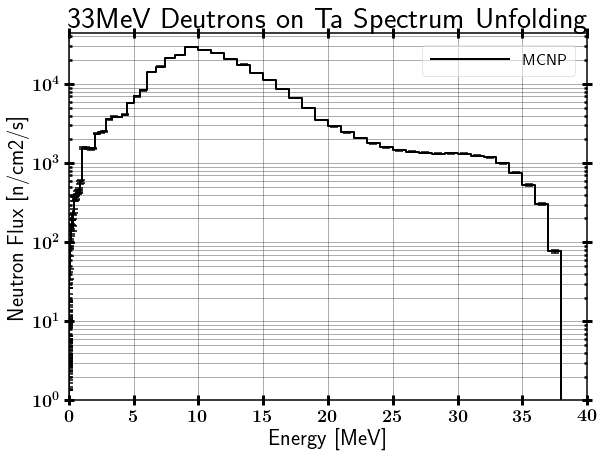

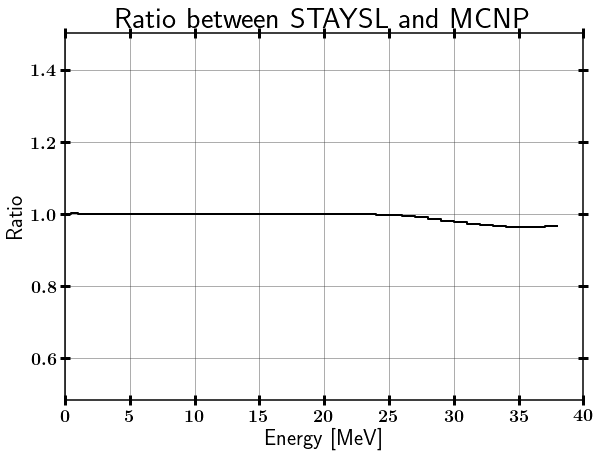

In [19]:
iter = 5

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))